In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Data Collection

In [2]:
# Load data from a csv file
filename = '/Users/administrator/Desktop/CIND820 Big Data Analytics Project/datanerd-startup-venture-funding/data/investments.csv'
df = pd.read_csv(filename)
df

,company_permalink,company_name,company_category_list,company_market,company_country_code,company_state_code,company_region,company_city,investor_permalink,investor_name,...,investor_city,funding_round_permalink,funding_round_type,funding_round_code,funded_at,funded_month,funded_quarter,funded_year,raised_amount_usd,Y
0,/organization/test-company-3,test company,NaN,NaN,ARE,NaN,Dubai,Dubai,/person/jamessss-bondddd,jamessss bondddd,...,NaN,/funding-round/c308019016ead7afb2a1d117018eb6fc,seed,NaN,1921-09-01,21-Sep,1921-Q3,1921,1000.0,Yes
1,/organization/andrewburnett-com-ltd,AndrewBurnett.com Ltd,|Internet|SEO|Services|Public Relations|Social...,Internet,GBR,NaN,Edinburgh,Edinburgh,/organization/ekaf,Ekaf,...,NaN,/funding-round/14fe2864e02d0f15ddc3ec8eacdc8e1b,seed,NaN,1974-01-01,Jan-74,1974-Q1,1974,NaN,No
2,/organization/abo-data,ABO Data,|Enterprise Software|,Enterprise Software,USA,TX,TX - Other,Italy,/person/antonio-murroni,ANTONIO MURRONI,...,NaN,/funding-round/809e211b969c3f66440fc15ffcd29385,seed,NaN,1979-01-01,Jan-79,1979-Q1,1979,1000000.0,Yes
3,/organization/abo-data,ABO Data,|Enterprise Software|,Enterprise Software,USA,TX,TX - Other,Italy,/person/filippo-murroni,FILIPPO Murroni,...,NaN,/funding-round/809e211b969c3f66440fc15ffcd29385,seed,NaN,1979-01-01,Jan-79,1979-Q1,1979,1000000.0,Yes
4,/organization/ikro,Ikro,NaN,NaN,BRA,NaN,BRA - Other,Canoas,/organization/crp-companhia-de-participacoes,CRP Companhia de Participações,...,NaN,/funding-round/46c353a8249170cc4b6ab89a522fefdc,venture,A,1982-06-01,Jun-82,1982-Q2,1982,724000.0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114501,/organization/helpling,Helpling,|Consumers|,Consumers,DEU,NaN,Berlin,Berlin,/person/lukasz-gadowski,Lukasz Gadowski,...,NaN,/funding-round/681af1b330a13043b17aeac45d841b88,venture,A,2014-12-02,14-Dec,2014-Q4,2014,17000000.0,Yes
114502,/organization/appknox,Appknox,|Mobile Security|SaaS|Mobile|,Mobile Security,SGP,NaN,Singapore,Singapore,/person/rajan-anandan,Rajan Anandan,...,NaN,/funding-round/bfb0b5859be2431f35882bc03370dd67,venture,NaN,2014-12-02,14-Dec,2014-Q4,2014,NaN,No
114503,/organization/strap,Strap,|Apps|,Apps,USA,OH,Cincinnati,Cincinnati,/person/trevor-wright,Trevor Wright,...,NaN,/funding-round/375e6c61fec5b3854ecbe5732dfdcabe,seed,NaN,2014-12-02,14-Dec,2014-Q4,2014,1200000.0,Yes
114504,/organization/strap,Strap,|Apps|,Apps,USA,OH,Cincinnati,Cincinnati,/person/wendy-lea,Wendy Lea,...,NaN,/funding-round/375e6c61fec5b3854ecbe5732dfdcabe,seed,NaN,2014-12-02,14-Dec,2014-Q4,2014,1200000.0,Yes


### Missing value treatment

In [3]:
# lets check the missing values
null = df.isnull().sum()
null_cent = round(df.isnull().sum()/len(df)*100, 2)
pd.concat([null, null_cent], axis=1)

,0,1
company_permalink,0,0.00
company_name,1,0.00
company_category_list,3264,2.85
company_market,3266,2.85
company_country_code,7359,6.43
company_state_code,35348,30.87
company_region,7359,6.43
company_city,8705,7.60
investor_permalink,66,0.06
investor_name,66,0.06


In [4]:
# removing features

# dropping company_state_code, investor_state_code, investor_category_list, investor_market and funding_round_code as they have more than 30% null values
# dropping features like funded_at, founded_at, funded_month, funded_quarter, 
#    funding_round_permalink as these are not relevant features

df = df.drop(['investor_category_list','investor_market','funded_at', 'company_state_code','investor_state_code','funding_round_code',
                      'funded_month','funded_quarter','funding_round_permalink'], axis=1)

In [5]:
#replace all Nan to 0 in raised_amount_usd column
df['raised_amount_usd'] = df['raised_amount_usd'].fillna(0)

#convert column raised_amount_usd from float to int
df = df.astype({"raised_amount_usd":'int'})

### Dataset information after cleaning

In [6]:
# The info method gives the column datatypes + number of non-null values 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114506 entries, 0 to 114505
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   company_permalink      114506 non-null  object
 1   company_name           114505 non-null  object
 2   company_category_list  111242 non-null  object
 3   company_market         111240 non-null  object
 4   company_country_code   107147 non-null  object
 5   company_region         107147 non-null  object
 6   company_city           105801 non-null  object
 7   investor_permalink     114440 non-null  object
 8   investor_name          114440 non-null  object
 9   investor_country_code  86521 non-null   object
 10  investor_region        86521 non-null   object
 11  investor_city          86007 non-null   object
 12  funding_round_type     114506 non-null  object
 13  funded_year            114506 non-null  int64 
 14  raised_amount_usd      114506 non-null  int64 
 15  

In [7]:
df

,company_permalink,company_name,company_category_list,company_market,company_country_code,company_region,company_city,investor_permalink,investor_name,investor_country_code,investor_region,investor_city,funding_round_type,funded_year,raised_amount_usd,Y
0,/organization/test-company-3,test company,NaN,NaN,ARE,Dubai,Dubai,/person/jamessss-bondddd,jamessss bondddd,NaN,NaN,NaN,seed,1921,1000,Yes
1,/organization/andrewburnett-com-ltd,AndrewBurnett.com Ltd,|Internet|SEO|Services|Public Relations|Social...,Internet,GBR,Edinburgh,Edinburgh,/organization/ekaf,Ekaf,NaN,NaN,NaN,seed,1974,0,No
2,/organization/abo-data,ABO Data,|Enterprise Software|,Enterprise Software,USA,TX - Other,Italy,/person/antonio-murroni,ANTONIO MURRONI,NaN,NaN,NaN,seed,1979,1000000,Yes
3,/organization/abo-data,ABO Data,|Enterprise Software|,Enterprise Software,USA,TX - Other,Italy,/person/filippo-murroni,FILIPPO Murroni,NaN,NaN,NaN,seed,1979,1000000,Yes
4,/organization/ikro,Ikro,NaN,NaN,BRA,BRA - Other,Canoas,/organization/crp-companhia-de-participacoes,CRP Companhia de Participações,NaN,NaN,NaN,venture,1982,724000,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114501,/organization/helpling,Helpling,|Consumers|,Consumers,DEU,Berlin,Berlin,/person/lukasz-gadowski,Lukasz Gadowski,NaN,NaN,NaN,venture,2014,17000000,Yes
114502,/organization/appknox,Appknox,|Mobile Security|SaaS|Mobile|,Mobile Security,SGP,Singapore,Singapore,/person/rajan-anandan,Rajan Anandan,NaN,NaN,NaN,venture,2014,0,No
114503,/organization/strap,Strap,|Apps|,Apps,USA,Cincinnati,Cincinnati,/person/trevor-wright,Trevor Wright,NaN,NaN,NaN,seed,2014,1200000,Yes
114504,/organization/strap,Strap,|Apps|,Apps,USA,Cincinnati,Cincinnati,/person/wendy-lea,Wendy Lea,NaN,NaN,NaN,seed,2014,1200000,Yes


### The describe() method returns a statistical summary for each of the columns in a DataFrame. It's important to note that the descriptive statistics returned by the describe() method depends on the data type of a column. For non-numeric columns, the descriptive statistics returned by the method are as follows:

In [8]:
df.describe(include=[np.number]) 

,funded_year,raised_amount_usd
count,114506.000000,1.145060e+05
mean,2010.686174,1.118688e+07
std,3.065592,4.458664e+07
min,1921.000000,0.000000e+00
25%,2009.000000,6.000000e+05
50%,2012.000000,3.063800e+06
75%,2013.000000,1.130000e+07
max,2014.000000,5.800000e+09


In [9]:
df.describe(include=[np.object])

,company_permalink,company_name,company_category_list,company_market,company_country_code,company_region,company_city,investor_permalink,investor_name,investor_country_code,investor_region,investor_city,funding_round_type,Y
count,114506,114505,111242,111240,107147,107147,105801,114440,114440,86521,86521,86007,114506,114506
unique,32335,32284,11874,712,101,965,2901,22276,22037,85,589,1381,13,2
top,/organization/fab-com,Fab,|Biotechnology|,Software,USA,SF Bay Area,San Francisco,/organization/sequoia-capital,Sequoia Capital,USA,SF Bay Area,Menlo Park,venture,Yes
freq,60,60,7762,9906,76523,32120,14287,776,776,60291,27269,9962,70615,101091


In [10]:
#company_name
df['company_name'].value_counts()

Fab                        60
ecomom                     59
CardioDx                   57
Practice Fusion            55
Path                       53
                           ..
Nordic Technology Group     1
smartB                      1
4tiitoo GmbH                1
Sophie & Juliet             1
manetch                     1
Name: company_name, Length: 32284, dtype: int64

In [11]:
df['company_name'].value_counts(normalize = True)

Fab                        0.000524
ecomom                     0.000515
CardioDx                   0.000498
Practice Fusion            0.000480
Path                       0.000463
                             ...   
Nordic Technology Group    0.000009
smartB                     0.000009
4tiitoo GmbH               0.000009
Sophie & Juliet            0.000009
manetch                    0.000009
Name: company_name, Length: 32284, dtype: float64

Text(0.5, 0, 'Company name')

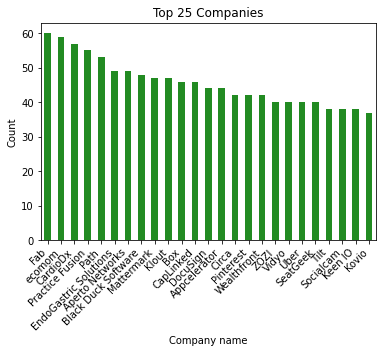

In [12]:
#Create a bar graph showing top 25 
pd.value_counts(df['company_name']).head(25).plot(kind='bar',color='forestgreen')
plt.xticks(rotation=45, ha='right')
plt.title('Top 25 Companies')
plt.ylabel('Count')
plt.xlabel('Company name')

In [13]:
#company_category_list
df['company_category_list'].value_counts()

|Biotechnology|                                                              7762
|Software|                                                                   7224
|Mobile|                                                                     2979
|Enterprise Software|                                                        2710
|E-Commerce|                                                                 2616
                                                                             ... 
|Babies|Kids|Marketplaces|E-Commerce|                                           1
|Search|Video|Enterprise Software|                                              1
|Internet|Teachers|Education|                                                   1
|Vertical Search|Online Travel|                                                 1
|Technology|Green|Clean Energy|Environmental Innovation|Clean Technology|       1
Name: company_category_list, Length: 11874, dtype: int64

In [14]:
df['company_category_list'].value_counts(normalize = True)

|Biotechnology|                                                              0.069776
|Software|                                                                   0.064940
|Mobile|                                                                     0.026779
|Enterprise Software|                                                        0.024361
|E-Commerce|                                                                 0.023516
                                                                               ...   
|Babies|Kids|Marketplaces|E-Commerce|                                        0.000009
|Search|Video|Enterprise Software|                                           0.000009
|Internet|Teachers|Education|                                                0.000009
|Vertical Search|Online Travel|                                              0.000009
|Technology|Green|Clean Energy|Environmental Innovation|Clean Technology|    0.000009
Name: company_category_list, Length: 11874, dtype: flo

Text(0.5, 0, 'Categories')

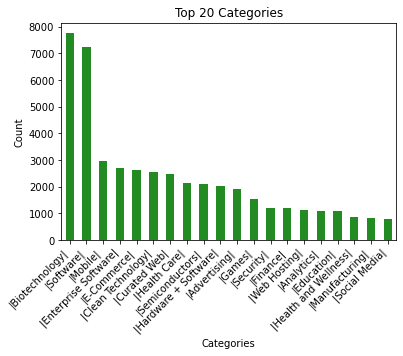

In [15]:
pd.value_counts(df['company_category_list']).head(20).plot(kind='bar',color='forestgreen')
plt.xticks(rotation=45, ha='right')
plt.title('Top 20 Categories')
plt.ylabel('Count')
plt.xlabel('Categories')

In [16]:
#company_market
df['company_market'].value_counts()

Software                  9906
Biotechnology             8164
Mobile                    5282
E-Commerce                4292
Enterprise Software       4128
                          ... 
Advanced Materials           1
Video Processing             1
Estimation and Quoting       1
China Internet               1
Low Bid Auctions             1
Name: company_market, Length: 712, dtype: int64

In [17]:
df['company_market'].value_counts(normalize = True)

Software                  0.089051
Biotechnology             0.073391
Mobile                    0.047483
E-Commerce                0.038583
Enterprise Software       0.037109
                            ...   
Advanced Materials        0.000009
Video Processing          0.000009
Estimation and Quoting    0.000009
China Internet            0.000009
Low Bid Auctions          0.000009
Name: company_market, Length: 712, dtype: float64

Text(0.5, 0, "Company's market")

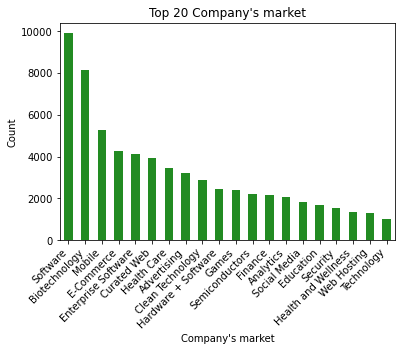

In [18]:
pd.value_counts(df['company_market']).head(20).plot(kind='bar',color='forestgreen')
plt.xticks(rotation=45, ha='right')
plt.title("Top 20 Company's market")
plt.ylabel('Count')
plt.xlabel("Company's market")

In [19]:
#company_country_code
df['company_country_code'].value_counts()

USA    76523
GBR     5933
CHN     2846
CAN     2667
DEU     2488
       ...  
OMN        1
BRN        1
GIB        1
NIC        1
MOZ        1
Name: company_country_code, Length: 101, dtype: int64

In [20]:
df['company_country_code'].value_counts(normalize = True)

USA    0.714187
GBR    0.055373
CHN    0.026562
CAN    0.024891
DEU    0.023220
         ...   
OMN    0.000009
BRN    0.000009
GIB    0.000009
NIC    0.000009
MOZ    0.000009
Name: company_country_code, Length: 101, dtype: float64

Text(0.5, 0, 'Countries')

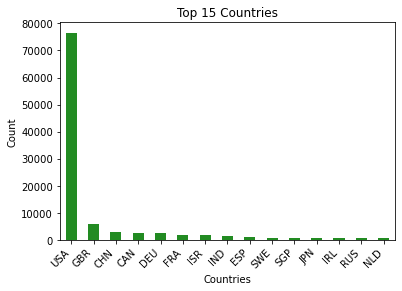

In [21]:
pd.value_counts(df['company_country_code']).head(15).plot(kind='bar',color='forestgreen')
plt.xticks(rotation=45, ha='right')
plt.title("Top 15 Countries")
plt.ylabel('Count')
plt.xlabel("Countries")

In [22]:
#company_region
df['company_region'].value_counts()

SF Bay Area      32120
New York City     8604
Boston            6286
London            3860
Los Angeles       3674
                 ...  
Kathmandu            1
Cantabria            1
Plymouth             1
Bushey               1
MLT - Other          1
Name: company_region, Length: 965, dtype: int64

In [23]:
df['company_region'].value_counts(normalize = True)

SF Bay Area      0.299775
New York City    0.080301
Boston           0.058667
London           0.036025
Los Angeles      0.034289
                   ...   
Kathmandu        0.000009
Cantabria        0.000009
Plymouth         0.000009
Bushey           0.000009
MLT - Other      0.000009
Name: company_region, Length: 965, dtype: float64

Text(0.5, 0, 'Company region')

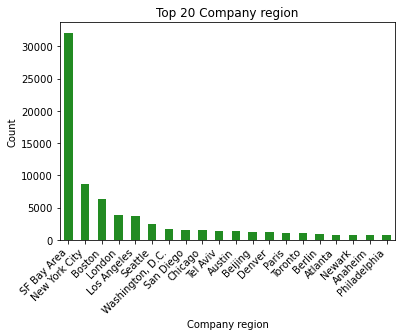

In [24]:
pd.value_counts(df['company_region']).head(20).plot(kind='bar',color='forestgreen')
plt.xticks(rotation=45, ha='right')
plt.title("Top 20 Company region")
plt.ylabel('Count')
plt.xlabel("Company region")

In [25]:
#company_city
df['company_city'].value_counts()

San Francisco    14287
New York          8140
London            2861
Mountain View     2601
Palo Alto         2520
                 ...  
Aschheim             1
Hawley               1
Taylors              1
Tutzing              1
Tromsø               1
Name: company_city, Length: 2901, dtype: int64

In [26]:
df['company_city'].value_counts(normalize = True)

San Francisco    0.135037
New York         0.076937
London           0.027041
Mountain View    0.024584
Palo Alto        0.023818
                   ...   
Aschheim         0.000009
Hawley           0.000009
Taylors          0.000009
Tutzing          0.000009
Tromsø           0.000009
Name: company_city, Length: 2901, dtype: float64

Text(0.5, 0, 'Company City')

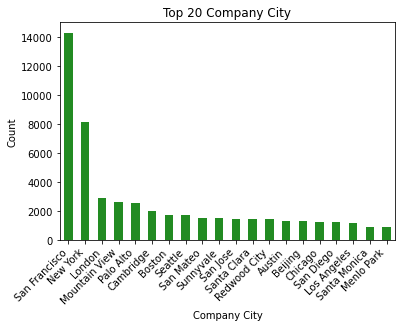

In [27]:
pd.value_counts(df['company_city']).head(20).plot(kind='bar',color='forestgreen')
plt.xticks(rotation=45, ha='right')
plt.title("Top 20 Company City")
plt.ylabel('Count')
plt.xlabel("Company City")

In [28]:
#investor_name
df['investor_name'].value_counts()

Sequoia Capital    776
Start-Up Chile     702
500 Startups       694
Intel Capital      674
Y Combinator       625
                  ... 
David Tanguay        1
Mark Hsu             1
Andy Hunt            1
Terence Garnett      1
VPSA                 1
Name: investor_name, Length: 22037, dtype: int64

In [29]:
df['investor_name'].value_counts(normalize = True)

Sequoia Capital    0.006781
Start-Up Chile     0.006134
500 Startups       0.006064
Intel Capital      0.005890
Y Combinator       0.005461
                     ...   
David Tanguay      0.000009
Mark Hsu           0.000009
Andy Hunt          0.000009
Terence Garnett    0.000009
VPSA               0.000009
Name: investor_name, Length: 22037, dtype: float64

Text(0.5, 0, 'Investors name')

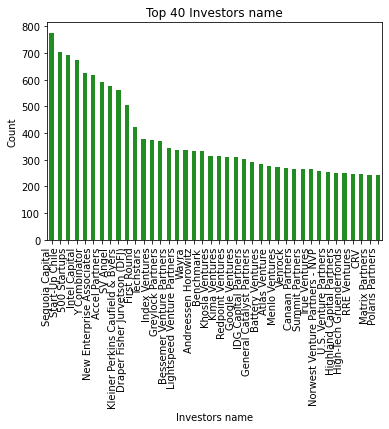

In [30]:
pd.value_counts(df['investor_name']).head(40).plot(kind='bar',color='forestgreen')
plt.xticks(rotation=90, ha='right')
plt.title("Top 40 Investors name")
plt.ylabel('Count')
plt.xlabel("Investors name")

In [31]:
#investor_country_code
df['investor_country_code'].value_counts()

USA    60291
GBR     4803
DEU     2158
FRA     2005
CAN     1999
       ...  
MAR        1
TTO        1
BHS        1
AZE        1
GEO        1
Name: investor_country_code, Length: 85, dtype: int64

In [32]:
df['investor_country_code'].value_counts(normalize = True)

USA    0.696837
GBR    0.055513
DEU    0.024942
FRA    0.023174
CAN    0.023104
         ...   
MAR    0.000012
TTO    0.000012
BHS    0.000012
AZE    0.000012
GEO    0.000012
Name: investor_country_code, Length: 85, dtype: float64

Text(0.5, 0, 'Investors country')

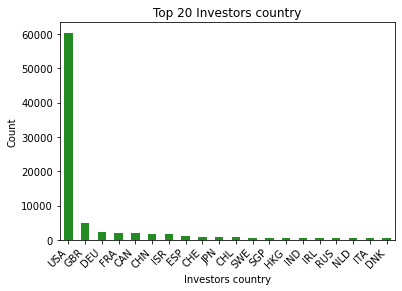

In [33]:
pd.value_counts(df['investor_country_code']).head(20).plot(kind='bar',color='forestgreen')
plt.xticks(rotation=45, ha='right')
plt.title("Top 20 Investors country")
plt.ylabel('Count')
plt.xlabel("Investors country")

In [34]:
#investor_city
df['investor_city'].value_counts()

Menlo Park                9962
New York                  7030
San Francisco             5934
Palo Alto                 5224
London                    3146
                          ... 
Narni                        1
Alicante                     1
Saint-denis-lès-rebais       1
Concord                      1
Tromsø                       1
Name: investor_city, Length: 1381, dtype: int64

In [35]:
df['investor_city'].value_counts(normalize = True)

Menlo Park                0.115828
New York                  0.081738
San Francisco             0.068994
Palo Alto                 0.060739
London                    0.036578
                            ...   
Narni                     0.000012
Alicante                  0.000012
Saint-denis-lès-rebais    0.000012
Concord                   0.000012
Tromsø                    0.000012
Name: investor_city, Length: 1381, dtype: float64

Text(0.5, 0, 'Investors city')

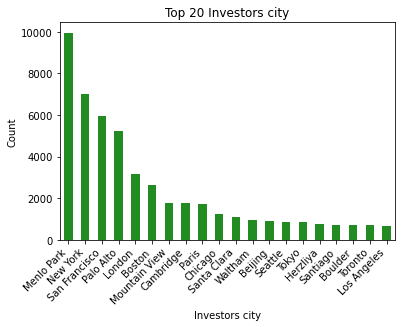

In [36]:
pd.value_counts(df['investor_city']).head(20).plot(kind='bar',color='forestgreen')
plt.xticks(rotation=45, ha='right')
plt.title("Top 20 Investors city")
plt.ylabel('Count')
plt.xlabel("Investors city")

In [37]:
#funding_round_type

In [38]:
df['funding_round_type'].value_counts()

venture                 70615
seed                    29272
angel                    4894
undisclosed              4479
private_equity           2128
debt_financing           1541
grant                     721
convertible_note          547
post_ipo_equity           126
equity_crowdfunding        80
secondary_market           53
post_ipo_debt              32
product_crowdfunding       18
Name: funding_round_type, dtype: int64

In [39]:
df['funding_round_type'].value_counts(normalize = True)

venture                 0.616693
seed                    0.255637
angel                   0.042740
undisclosed             0.039116
private_equity          0.018584
debt_financing          0.013458
grant                   0.006297
convertible_note        0.004777
post_ipo_equity         0.001100
equity_crowdfunding     0.000699
secondary_market        0.000463
post_ipo_debt           0.000279
product_crowdfunding    0.000157
Name: funding_round_type, dtype: float64

Text(0.5, 0, 'Founding Round Type')

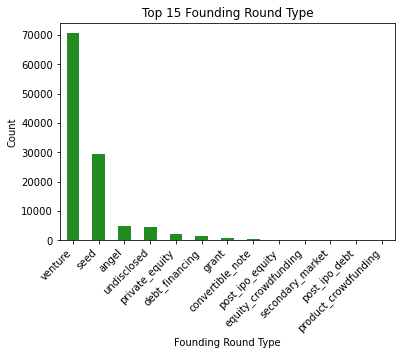

In [40]:
pd.value_counts(df['funding_round_type']).head(15).plot(kind='bar',color='forestgreen')
plt.xticks(rotation=45, ha='right')
plt.title("Top 15 Founding Round Type")
plt.ylabel('Count')
plt.xlabel("Founding Round Type")

In [41]:
#funded_year
df['funded_year'].value_counts()

2013    21041
2014    20012
2012    16583
2011    13089
2010     9708
2008     7366
2009     7031
2007     6946
2006     5735
2005     4290
2004      707
2000      455
2003      374
2002      359
2001      309
1999      254
1998       65
1997       32
1996       30
1990       19
1995       17
1994       16
1993       15
1992       12
1991       10
1987        7
1985        5
1986        4
1982        3
1989        3
1984        2
1988        2
1979        2
1974        1
1921        1
1983        1
Name: funded_year, dtype: int64

In [42]:
df['funded_year'].value_counts(normalize = True)

2013    0.183755
2014    0.174768
2012    0.144822
2011    0.114308
2010    0.084782
2008    0.064329
2009    0.061403
2007    0.060661
2006    0.050085
2005    0.037465
2004    0.006174
2000    0.003974
2003    0.003266
2002    0.003135
2001    0.002699
1999    0.002218
1998    0.000568
1997    0.000279
1996    0.000262
1990    0.000166
1995    0.000148
1994    0.000140
1993    0.000131
1992    0.000105
1991    0.000087
1987    0.000061
1985    0.000044
1986    0.000035
1982    0.000026
1989    0.000026
1984    0.000017
1988    0.000017
1979    0.000017
1974    0.000009
1921    0.000009
1983    0.000009
Name: funded_year, dtype: float64

Text(0.5, 0, 'Found Year')

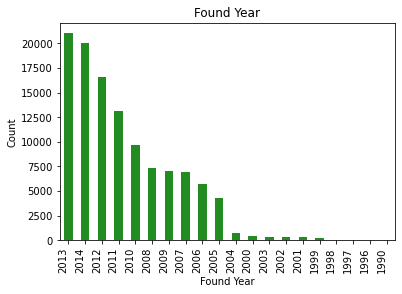

In [43]:
pd.value_counts(df['funded_year']).head(20).plot(kind='bar',color='forestgreen')
plt.xticks(rotation=90, ha='right')
plt.title("Found Year")
plt.ylabel('Count')
plt.xlabel("Found Year")

### Group-level Aggregations

In [44]:
df.groupby('funding_round_type')[['raised_amount_usd']].agg(['mean','median','min','max'])

raised_amount_usd                                 
                                  mean      median      min         max
funding_round_type                                                     
angel                     9.035363e+05    500000.0        0    63590263
convertible_note          8.700534e+05    640000.0        0    10000000
debt_financing            2.038674e+07   4000000.0        0   750000000
equity_crowdfunding       5.992685e+05    160230.5    15826     7000000
grant                     5.488604e+06    202658.0        0   750000000
post_ipo_debt             3.739191e+08  48000000.0  3500000  5800000000
post_ipo_equity           2.932484e+08  25000000.0        0  3200000000
private_equity            6.984986e+07  38904959.0        0  2600000000
product_crowdfunding      1.241036e+06    405329.0   132599     8600000
secondary_market          2.114250e+07         0.0        0   200000000
seed                      8.808792e+05    500000.0        0   100000000
undisclosed               1.851566e+06         0.0        0   292432833
venture                   1.427274e+07   8000000.0        0  1200000000

In [45]:
df.groupby('company_market')[['raised_amount_usd']].agg(['mean','median','min','max'])

raised_amount_usd                             
                            mean     median    min        max
company_market                                               
3D                  5.035845e+06  1000000.0      0   20000000
3D Printing         4.548769e+06  1000000.0      0   19000000
3D Technology       2.271235e+06  2424402.0      0    6390950
Accounting          1.081139e+07  3000000.0      0  100000000
Ad Targeting        8.493224e+06  3500000.0      0   65000000
...                          ...        ...    ...        ...
iOS                 3.192446e+06   800000.0      0   40000000
iPad                1.589109e+06   800000.0      0    7000000
iPhone              2.216571e+06  1000000.0      0   20500000
iPod Touch          2.088429e+06  2500000.0  18000    2500000
mHealth             9.413860e+04    64021.0      0     276672

[712 rows x 4 columns]

In [46]:
df.groupby('company_country_code')[['raised_amount_usd']].agg(['mean','median','min','max'])

raised_amount_usd                                  
                                  mean      median       min         max
company_country_code                                                    
ARE                       1.058912e+07    400000.0         0   201000000
ARG                       2.038045e+06     75000.0         0    30000000
ARM                       5.362595e+06    231299.0     32012    18787500
AUS                       7.091499e+06   1000000.0         0   364000000
AUT                       4.393624e+06   1350000.0         0    34082500
...                                ...         ...       ...         ...
URY                       1.159500e+06     40000.0         0    10000000
USA                       1.238729e+07   4500000.0         0  3200000000
VNM                       2.004545e+07    500000.0         0   100000000
ZAF                       5.485419e+06    125000.0         0   100000000
ZWE                       1.000000e+07  10000000.0  10000000    10000000

[101 rows x 4 columns]

### Distribution Visualization

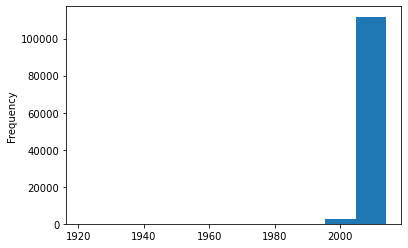

In [47]:
df['funded_year'].plot(kind = 'hist')

### Relationship Visualization

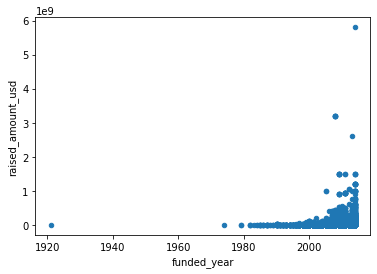

In [48]:
#relationship(correlation) between year and raised_amount
df.plot(kind = 'scatter', x = 'funded_year', y = 'raised_amount_usd')